In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

# Import Data

In [2]:
cols = 'symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price'.split(',')
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=cols)

In [3]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Preparation

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
cars.replace('?', np.nan, inplace=True)

In [6]:
cols_to_convert = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
cars[cols_to_convert] = cars[cols_to_convert].copy().astype('float')

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [8]:
# SELECT ONLY NUMERIC COLUMNS
cars_num = cars.select_dtypes(['int64', 'float64'])

In [9]:
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(5)
memory usage: 25.7 KB


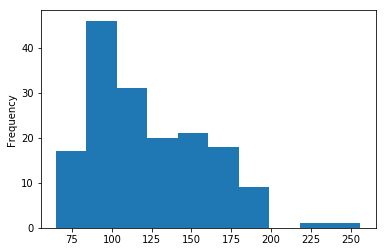

In [10]:
cars_num['normalized_losses'].plot.hist()

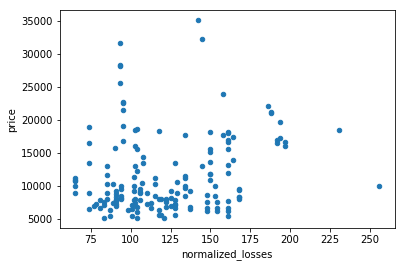

In [11]:
cars_num.plot.scatter('normalized_losses', 'price')

In [12]:
# DROP COLUMN 'normalized_losses' for it has may rows with null values and doesn't seem to have significant direct influence on 'price'
cars_num = cars_num.copy().drop(columns='normalized_losses')

In [13]:
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(10), int64(5)
memory usage: 24.1 KB


In [14]:
# DROP ROWS WITH NULL VALUES
cars_num.dropna(inplace=True)

In [15]:
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 15 columns):
symboling            195 non-null int64
wheel_base           195 non-null float64
length               195 non-null float64
width                195 non-null float64
height               195 non-null float64
curb_weight          195 non-null int64
engine_size          195 non-null int64
bore                 195 non-null float64
stroke               195 non-null float64
compression_ratio    195 non-null float64
horsepower           195 non-null float64
peak_rpm             195 non-null float64
city_mpg             195 non-null int64
highway_mpg          195 non-null int64
price                195 non-null float64
dtypes: float64(10), int64(5)
memory usage: 24.4 KB


In [16]:
cars_num.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [17]:
# NORMALIZE COLS EXCEPT 'price' COL
cars_norm = (cars_num-cars_num.min())/(cars_num.max()-cars_num.min())
cars_norm['price'] = cars_num['price']

In [18]:
cars_norm.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Data Ready
## Start building models to predict 'price'
## 1. Univariate KNN models, 50:50 = train:test

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
def knn_train_test(x, y, df, k=5):
    train_df, test_df = train_test_split(df, train_size=0.5, test_size=0.5, random_state=1)
    knn = KNeighborsRegressor(k, algorithm='brute')
    knn.fit(train_df[[x]], train_df[y])
    prediction = knn.predict(test_df[[x]])
    mse = mean_squared_error(test_df[y], prediction)
    rmse = mse ** (1/2)
    return rmse

In [21]:
univariate_result = dict()
col_names = cars_norm.columns.drop('price')

for var in col_names:
    result = knn_train_test(var, 'price', cars_norm)
    univariate_result[var] = result

univariate_result = dict(sorted(univariate_result.items(), key=lambda x: x[1]))
univariate_result

{'engine_size': 3981.155472718842,
 'highway_mpg': 4312.735276752672,
 'curb_weight': 4624.8205502969495,
 'width': 5200.499999470224,
 'horsepower': 5269.5986232156165,
 'city_mpg': 5354.730438422019,
 'length': 5700.125112160759,
 'wheel_base': 6401.199136131305,
 'compression_ratio': 7277.847432715084,
 'bore': 7923.54280884968,
 'peak_rpm': 8103.003529253953,
 'height': 8237.987306375266,
 'stroke': 8573.640320143113,
 'symboling': 9455.096143199331}

### 'engine_size' feature is the best predictor of car 'price' for univariate models, on basis of RMSE metric

## 2. Multivariate KNN models, 50:50 = train:test

In [22]:
def knn_train_test(xs, y, df, k=5):
    train_df, test_df = train_test_split(df, train_size=0.5, test_size=0.5, random_state=1)
    knn = KNeighborsRegressor(k)
    knn.fit(train_df[xs], train_df[y])
    prediction = knn.predict(test_df[xs])
    mse = mean_squared_error(test_df[y], prediction)
    rmse = mse ** (1/2)
    return rmse

In [23]:
# MULTI FEATURES
two_features = ['engine_size', 'curb_weight']
three_features = two_features + ['horsepower']
four_features = three_features + ['city_mpg']
five_features = four_features+ ['width']
multivariate_result = dict()

for features in [two_features, three_features, four_features, five_features]:
    result = knn_train_test(features, 'price', cars_norm)
    multivariate_result[str(features)] = result

multivariate_result = dict(sorted(multivariate_result.items(), key=lambda x: x[1]))
multivariate_result

{"['engine_size', 'curb_weight', 'horsepower', 'city_mpg']": 3515.689723603757,
 "['engine_size', 'curb_weight', 'horsepower']": 3621.1077484264792,
 "['engine_size', 'curb_weight', 'horsepower', 'city_mpg', 'width']": 3982.5331606290742,
 "['engine_size', 'curb_weight']": 4011.7969788093305}

### More features does not mean better prediction
### Now differentiate K-values and find the best K-value

In [24]:
# DIFFERENCIATING K VALUES
multi_k_result = {}
for features in [two_features, three_features, four_features, five_features]:
    rmses = {}
    for k in range(1,26):
        result = knn_train_test(features, 'price', cars_norm, k)
        rmses[k] = result
    multi_k_result[str(features)] = rmses

In [25]:
result_df = pd.DataFrame(multi_k_result).sort_index()

In [26]:
result_df

,"['engine_size', 'curb_weight']","['engine_size', 'curb_weight', 'horsepower']","['engine_size', 'curb_weight', 'horsepower', 'city_mpg']","['engine_size', 'curb_weight', 'horsepower', 'city_mpg', 'width']"
1,4064.025839,3989.953289,3851.180054,4159.898743
2,3848.729131,3897.072923,3813.355335,3500.433104
3,3833.405256,3304.154146,3466.730798,3616.042938
4,3799.534099,3441.894395,3468.831445,3650.617013
5,4011.796979,3621.107748,3515.689724,3982.533161
6,4056.012621,3700.412797,3667.376006,4012.276386
7,4077.269553,3817.212165,3827.263472,3872.809837
8,4177.386838,3890.065917,4016.247525,3895.498084
9,4391.195766,4154.860915,4136.209495,3943.291742
10,4518.308729,4180.419151,4185.245388,4205.437062


Text(0.5,1,'Multivariate KNN Models with different features and k-values')

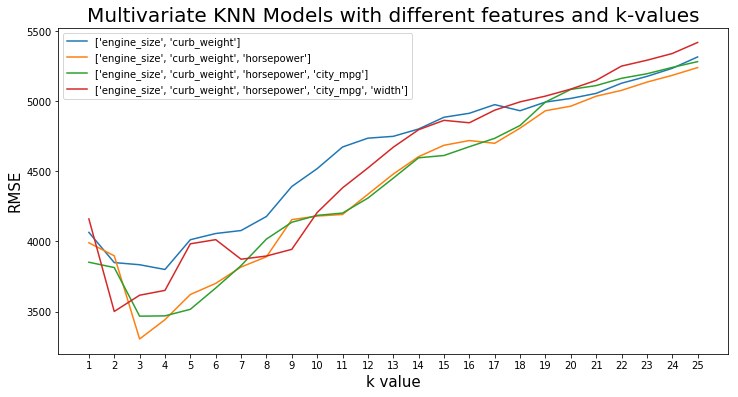

In [27]:
result_df.plot(figsize=(12,6), xticks=result_df.index)
plt.ylabel('RMSE', fontsize=15)
plt.xlabel('k value', fontsize=15)
plt.title('Multivariate KNN Models with different features and k-values', fontsize=20)

### The best K-values range from 2 to 4
### For this analysis so far, *'three-features with k-value of 3'* is the best KNN model for predicting car price